In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [237]:
def get_fuzzy(a, b, steps = 0.01):
    values = np. arange(a, b+1, steps)
    if(len(values) == 3):
        pb1 = np.array([0])
        middle = 1
    elif len(values) == 4:
        pb1 = np.array([0, 1])
        middle = 2 
    else:
        pb1 = np.array([0])
        middle = np.random.randint(1, len(values) - 2)
    
    if(middle > len(pb1)):
        pb1 = np.append(pb1, np.random.rand(middle-1))
    pb1 = np.sort(pb1)
    pb2 = [0,1]
    if len(values) - middle > len(pb2):
        pb2 = np.append(pb2, np.random.rand(len(values) - middle - 2))
    pb2 = np.sort(pb2)
    pb2 = pb2[::-1]
    return np.array([values, np.append(pb1, pb2)]).T

def add_fuzzy(a, b, roundof = 4):
    vals = {}
    for a_val in a:
        for b_val in b:
            if round(a_val[0] + b_val[0], roundof) not in vals:
                vals[round(a_val[0] + b_val[0], roundof)] = min(a_val[1], b_val[1])
            else:
                vals[round(a_val[0] + b_val[0], roundof)] = max(vals[round(a_val[0] + b_val[0], roundof)],min(a_val[1], b_val[1]))
    result = np.zeros((len(vals), 2))
    ind = 0
    for key in sorted(vals.keys()):
        result[ind][0] = key
        result[ind][1] = vals[key]
        ind += 1
    return result

def multiply_fuzzy(a, b, roundof = 4):
    vals = {}
    for a_val in a:
        for b_val in b:
            if round(a_val[0] * b_val[0], roundof) not in vals:
                vals[round(a_val[0] * b_val[0], roundof)] = min(a_val[1], b_val[1])
            else:
                vals[round(a_val[0] * b_val[0], roundof)] = max(vals[round(a_val[0] * b_val[0], roundof)],min(a_val[1], b_val[1]))
    result = np.zeros((len(vals), 2))
    ind = 0
    for key in sorted(vals.keys()):
        result[ind][0] = key
        result[ind][1] = vals[key]
        ind += 1
    return result

def scalaradd_fuzzy(a, b):
    result = np.copy(a)
    for i in range(len(a)):
        result[i][0] += b
    return result
def scalarmultiply_fuzzy(a, b):
    result = np.copy(a)
    for i in range(len(a)):
        result[i][0] *= b
    return result

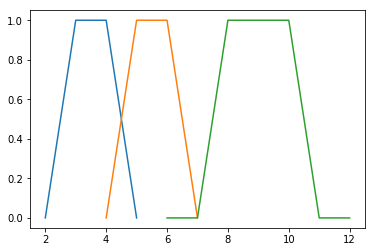

In [216]:
a = get_fuzzy(2, 5, 1)
b = get_fuzzy(4, 7, 1)
c = add_fuzzy(a, b, 3)
plt.plot(a.T[0], a.T[1])
plt.plot(b.T[0], b.T[1])
plt.plot(c.T[0], c.T[1])

X
[[3 0]
 [4 1]
 [5 0]]
f(x) = X^2 + 1
[[15.  0.]
 [18.  0.]
 [21.  0.]
 [22.  1.]
 [26.  0.]
 [31.  0.]]


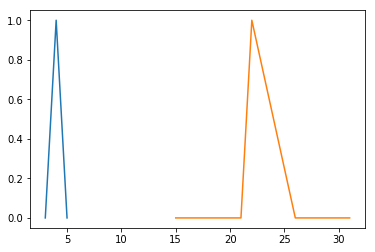

In [254]:
#function is X^2 + 1
X = get_fuzzy(3, 5, 1)
func = scalaradd_fuzzy(multiply_fuzzy(X, X), 6)
print('X')
print(X)
print('f(x) = X^2 + 1')
print(func)
plt.plot(X.T[0], X.T[1])
plt.plot(func.T[0], func.T[1])